## Exemplo 14.2.2

<b>Referência:</b> Cálculo Vol. 2 - James Stewart - Tradução da 6ª edição norte americana

$$f(x,y) = \frac{xy}{x^2 + y^2}$$

In [4]:
import numpy as np

def f(x, y):
    try:
        return (x * y ) / (x ** 2 + y ** 2)
    except:
        return np.nan
    
z = np.zeros((21,21))
x = np.arange(-1, 1.1, 0.1)
y = np.arange(-1, 1.1, 0.1)

for i in range(len(x)):
    for j in range(len(y)):
        z[i][j] = f(x[i], y[j])
        
z[10][10] = np.nan # correção devido erro de arrendondamento

Vejamos agora o heatmap:

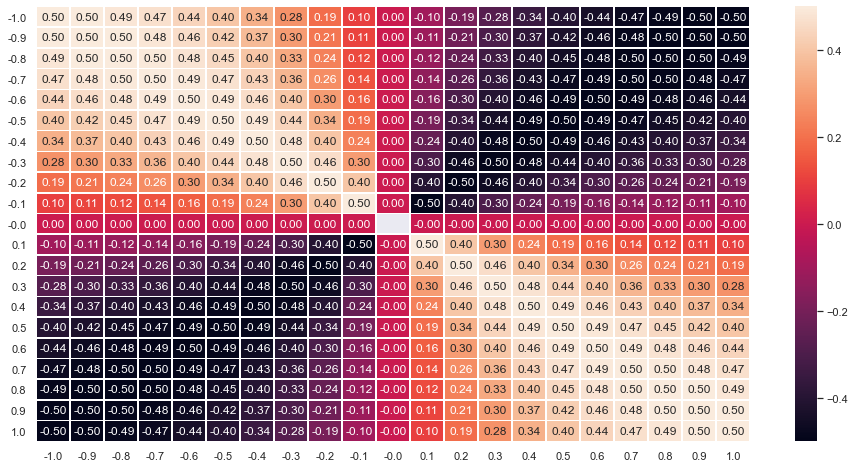

In [6]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

xtickpositions = list(map(lambda x: x + 0.5, range(0,21)))
xticklabels = list(map(lambda t: round(t,2), y))
ytickpositions = list(map(lambda x: x + 0.5, range(0,21)))
yticklabels = list(map(lambda t: round(t,2), y))

ax = sns.heatmap(
    z, 
    annot=True, 
    linewidths=.5, 
    fmt='.2f'
)
plt.xticks(xtickpositions, xticklabels)
plt.yticks(ytickpositions, yticklabels, rotation="horizontal")
plt.show()

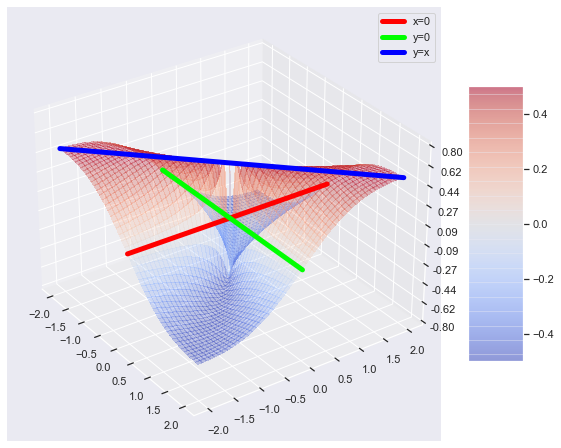

In [15]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
from matplotlib import cm
from IPython.display import clear_output
from matplotlib.ticker import LinearLocator, FormatStrFormatter



for angle in range(30,330,5):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')

    # Make data.
    X = np.arange(-2, 2, 0.01) # L
    Y = np.arange(-2, 2, 0.01) # K
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False, alpha=0.3)
    
    t = np.linspace(-2,2, 100)
    x = 0 + 0 * t
    y = t
    z = f(x, y)
    ax.plot(x, y, z, linewidth=5, color='#ff0000', label="x=0") 
    
    t = np.linspace(-2, 2, 100)
    x = t
    y = 0 + 0 * t
    z = f(x, y)
    ax.plot(x, y, z, linewidth=5, color='#00ff00', label="y=0") 
    
    t = np.linspace(-2, 2, 100)
    x = t
    y = t
    z = f(x, y)
    ax.plot(x, y, z, linewidth=5, color='#0000ff', label="y=x") 
    

    # Customize the z axis.
    ax.set_zlim(-0.8, 0.8)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    plt.legend()

    ax.view_init(30,angle)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    # configura o ângulo
    ax.view_init(30,angle)

    # mostra
    plt.tight_layout()
    plt.gca()
    clear_output(wait=True)
    plt.show()